### Aplicaciones en Ciencias de Datos e Inteligencia Artificial
#### - Actividad 2: Regresiones

2.1 Solución cerrada de regresión lineal

- Utilizando Numpy o Scipy genere 1,000 datos que distribuyan uniforme entre 0 y 3, U(0, 3).
- Genere los 1,000 datos de la variable dependiente, de la siguiente forma y = 5 + 2x + U(2, 4)
- Genere un gráfico de dispersión (scatter plot) entre la variable
dependiente y la variable independiente.

In [43]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

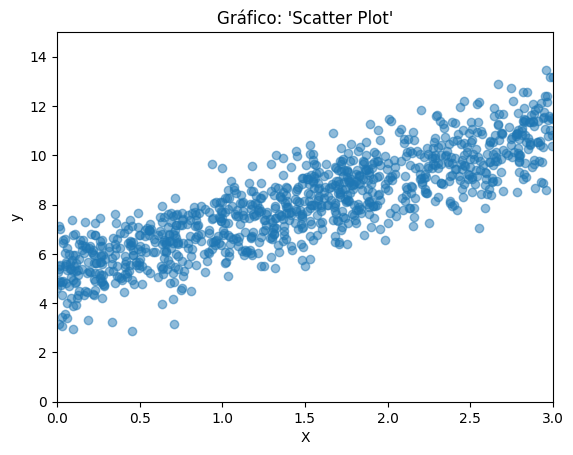

In [9]:
x = 3 * np.random.rand(1000, 1)
y = 5 + 2*x + np.random.randn(1000, 1)

X_ = np.c_[np.ones((1000,1)), x] # concatenar 1 a variables independientes
theta_opt = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y) # calcular thetas de forma cerrada

plt.plot(color='blue', alpha=0.5)
plt.ylabel('y')
plt.xlabel('X')
plt.axis([0, 3, 0, 15])
plt.title("Gráfico: 'Scatter Plot'")
plt.scatter(x, y, alpha = 0.5)
plt.show()

- Genere una función que permita visualizar los datos simulados. Esta función debe recibir como
argumentos la variable dependiente y, la variable independiente x y el número de datos a simular.


In [10]:
def regresion_lineal(
        x: np.array,
        y: np.array,
        n: int
        ):

    x = 3 * np.random.rand(n, 1)
    y = 5 + 2 * x + np.random.randn(n, 1)

    plt.plot(color='blue', alpha=0.5)
    plt.ylabel('y')
    plt.xlabel('X')
    plt.axis([0, 3, 0, 15])
    plt.title("Gráfico: 'Scatter Plot'")
    plt.scatter(x, y, alpha = 0.5)
    image = plt.show()

    return image

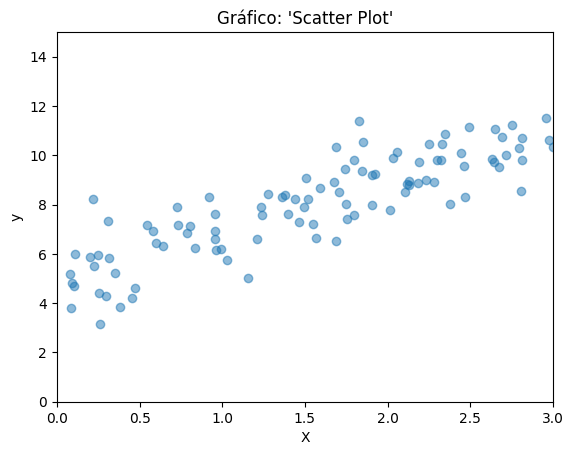

In [ ]:
regresion_lineal(x, y, 100)

- Aplique las operaciones matriciales necesarias para ajustar una regresión lineal a través de su
solución cerrada (use numpy.linalg).
- Cree una función que reciba la variable dependiente y la
variable independiente, esta función debe retornar los parámetros optimizados.


In [13]:
def solucion_cerrada(x: np.array, y: np.array):
    X = np.c_[np.ones((len(x), 1)), x]
    s_cerrada = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    return s_cerrada

In [14]:
solucion_cerrada(x, y)

array([[5.10429636],
       [1.96435285]])

- Genere un gráfico que incluya la solución (recta óptima) y los datos utilizados.
- Cree una función que reciba x, y y los parámetros óptimos y cree dicha visualización.

In [ ]:
def recta_optima(
        x: np.array,
        y: np.array,
        parametro_optimo: np.array):

    X_nuevo = np.array([[0], [3]])
    X_nuevo_ = np.c_[np.ones((2, 1)), X_nuevo]
    y_pred = X_nuevo_.dot(parametro_optimo)

    plt.plot(X_nuevo, y_pred, color='red')
    plt.scatter(x, y, color='grey', alpha=0.2) # alpha: transparencia
    plt.ylabel('y')
    plt.xlabel('X')
    plt.axis([0, 3, 0, 15])
    plt.title("Gráfico: 'Scatter Plot'")
    plt.legend(["Recta óptima"])
    recta = plt.show()

    return recta


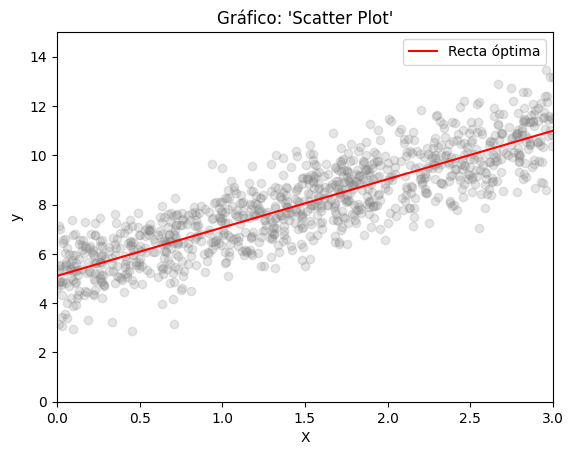

In [30]:
recta_optima(x, y, solucion_cerrada(x, y))

- Cree una clase cuyo nombre sea regressionLineal que contenga los métodos antes generados.
- La clase debe ser inicializada con los atributos: tipo de datos (simulado o real) y tamaño de la base
de datos.

In [ ]:
class regressionLineal:
    def __init__(self, tipo:str, tamaño=1000, x=None, y=None):
        self.tipo = tipo
        self.tamaño = tamaño
        self.data = None
        self.x = x
        self.y = y

    def genera_data(self):
        if self.tipo == 'simulado':
            self.x = 3 * np.random.rand(self.tamaño, 1)
            self.y = 5 + 2 * self.x + np.random.randn(self.tamaño, 1)
        
        return self.x, self.y
        
    def graficar_datos(self):    
        plt.scatter(self.x, self.y, color='blue', alpha=0.3)
        plt.ylabel('y')
        plt.xlabel('X')
        plt.title("Gráfico: 'Scatter Plot'")
        image = plt.show()

        return image
    
    def solucion_cerrada(self):
        X = np.c_[np.ones((int(self.tamaño), 1)), self.x]
        s_cerrada = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(self.y)

        return s_cerrada

    def recta_optima(self):
        
        X_nuevo = np.array([[0], [3]])
        X_nuevo_ = np.c_[np.ones((2, 1)), X_nuevo]
        y_pred = X_nuevo_.dot(self.solucion_cerrada())

        plt.plot(X_nuevo, y_pred, color='blue')
        plt.scatter(self.x, self.y, color='brown', alpha=0.3) # alpha: transparencia
        plt.ylabel('y')
        plt.xlabel('X')
        plt.axis([0, 3, 0, 15])
        plt.title("Gráfico: 'Desde una clase'")
        plt.legend(["Recta óptima"])
        recta = plt.show()
            
        return recta

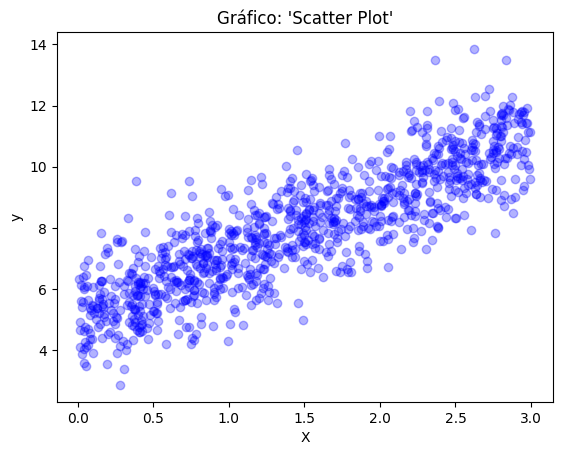

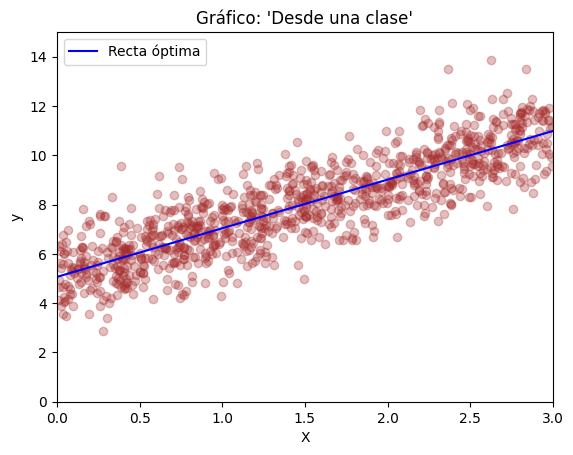

In [130]:
test_clase = regressionLineal('simulado', 1000)
test_clase.genera_data()
test_clase.graficar_datos()
test_clase.solucion_cerrada()
test_clase.recta_optima()


- Cargue la base de datos adjunta a la actividad (measurements.csv).
- Visualizar las variables contenidas en la base de datos con un scatter plot.
- Use la regresión lineal previamente implementada para predecir el consumo (consume) mediante la distancia recorrida (distance). (Use la clase definida, funciones aisladas o sklearn)

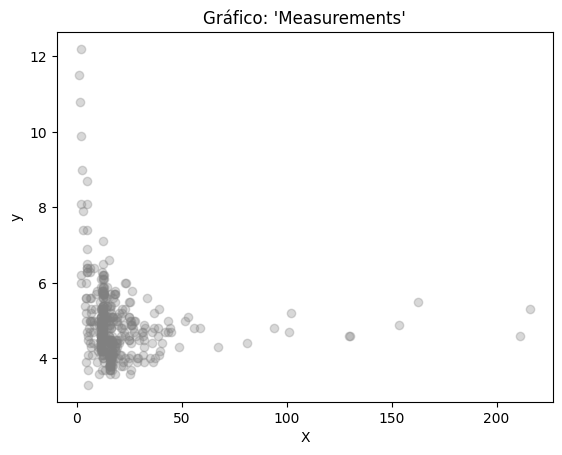

In [ ]:
data = pd.read_csv('measurements.csv', encoding="latin-1", sep=",")
data = pd.DataFrame(data)

x = data["distance"].str.replace(',', '.').astype(float).values
y = data["consume"].str.replace(',', '.').astype(float).values

plt.scatter(x, y, color='grey', alpha=0.3)
plt.ylabel('y')
plt.xlabel('X')
plt.title("Gráfico: 'Measurements'")
plt.show()

- Genere una transformación polinomial de la variable independiente (sklearn preprocessing.PolynomialFeatures).

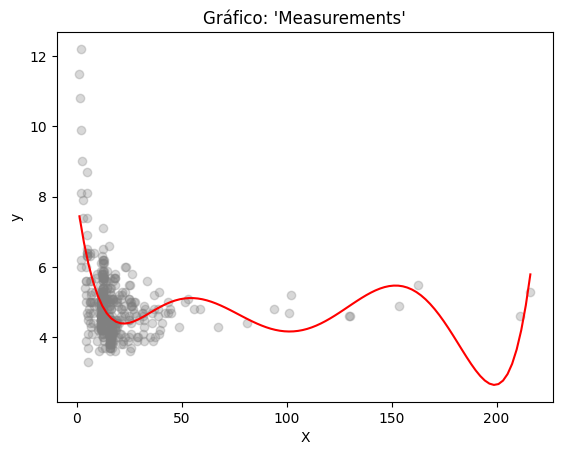

In [ ]:
data = pd.read_csv('measurements.csv', encoding="latin-1", sep=",")
data = pd.DataFrame(data)

x = data["distance"].str.replace(',', '.').astype(float).values
y = data["consume"].str.replace(',', '.').astype(float).values
X = x.reshape(-1, 1)

def calcular_polinomial(grado, x=x, y=y):
    
    poly = PolynomialFeatures(grado)
    X_poly = poly.fit_transform(x)

    modelo = LinearRegression()
    modelo.fit(X_poly, y)

    x_linea = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_linea = modelo.predict(poly.transform(x_linea))
    
    plt.scatter(x, y, color='grey', alpha=0.3)
    plt.plot(x_linea, y_linea, color='red')
    plt.ylabel('y')
    plt.xlabel('X')
    plt.title("Gráfico: 'Measurements'")
    image = plt.show()

    return image

calcular_polinomial(grado=6, x=X, y=y)

- Ajuste regresiones polinomiales de diferentes grados.
- Grafique.

- ¿Qué observa en el error cuadrático medio y en la forma de las predicciones a medida que aumenta el grado del polinomio?
    
    **Respuesta:** Observamos que a mayor grado la curva se asemeja a una onda, lo que fluctua entre altos y bajos. Creemos que es el grado 6 el que más se acomoda a la realidad de los datos sin tanto ruido (color naranja). Pero probamos otros grados que se vió como Overfitting. 
    De igual forma, se puede observar, que el grado 1, es la misma línea de la regresión lineal como el ejemplo anterior con nuestra clase creada, seríaun Underfitting.
    
    En conclusión el Good fit para nuestro criterio es el grado 6 dado que tiene menor distancia del dato a la linea, mínima de errores cuadráticos, sólo se vé por inspección gráfica.

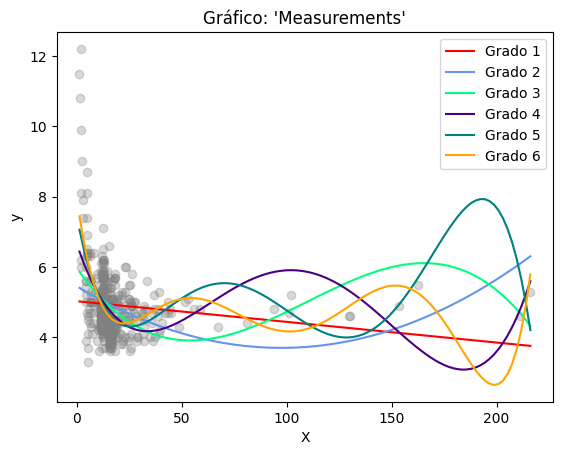

In [37]:
ata = pd.read_csv('measurements.csv', encoding="latin-1", sep=",")
data = pd.DataFrame(data)

x = data["distance"].str.replace(',', '.').astype(float).values
y = data["consume"].str.replace(',', '.').astype(float).values
X = x.reshape(-1, 1)

def polinomial_6grados(x=x, y=y):
    
    colors = ['', 'red', 'cornflowerblue', 'springgreen', 'indigo', 'teal', 'orange']
    legend = []

    for i in range(1, 7):
        poly = PolynomialFeatures(i)
        X_poly = poly.fit_transform(x)
        modelo = LinearRegression()
        modelo.fit(X_poly, y)
        x_linea = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
        y_linea = modelo.predict(poly.transform(x_linea))
        plt.plot(x_linea, y_linea, color=colors[i])
        legend.append(f'Grado {i}')
    
    plt.legend(legend)
    plt.scatter(x, y, color='grey', alpha=0.3)
    plt.ylabel('y')
    plt.xlabel('X')
    plt.title("Gráfico: 'Measurements'")
    image = plt.show()

    return image

polinomial_6grados(x=X, y=y)

Separe la base de datos en una para ajustar el modelo y otra para testearlo (80%-20%).
 - Utilizando la misma base de datos y una transformación polinomial de grado mayor a 5, ajuste en los datos de entrenamiento regresión ridge y Lasso (from sklearn.linear model import Lasso, ridge).
 - Modifique el parámetro de penalización y obtenga los valores de los parámetros y grafique las predicciones ¿Qué puede comentar al respecto? ¿Qué ocurre al aumentar el valor de alfa (penalización) en cada modelo?´
 - ¿Qué diferencia se observa entre ridge y Lasso?.

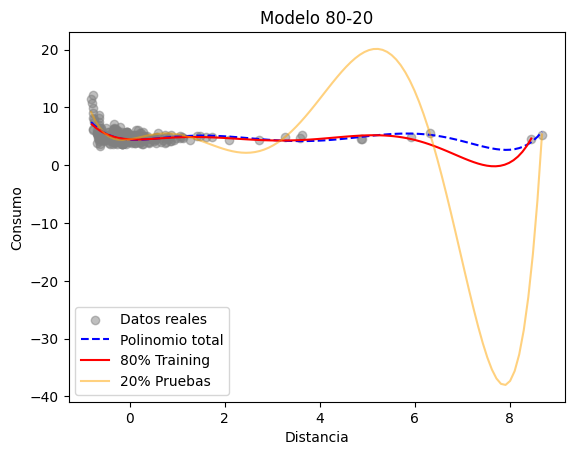

In [42]:
df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values
X = x.reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 80 - 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


def calcular_polinomial(grado, x, y):
    
    poly = PolynomialFeatures(grado)
    X_poly = poly.fit_transform(x)

    modelo = LinearRegression()
    modelo.fit(X_poly, y)

    x_linea = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_linea = modelo.predict(poly.transform(x_linea))

    coefs = modelo.coef_
    intercepto = modelo.intercept_
    
    return x_linea, y_linea, intercepto, coefs

grado = 6
polinomio_ajuste = calcular_polinomial(grado, X_train, y_train)
polinomio_test = calcular_polinomial(grado, X_test, y_test)
polinomio_total = calcular_polinomial(grado, X, y)

plt.scatter(X, y, color='grey', alpha=0.5)
plt.plot(polinomio_total[0], polinomio_total[1], color='blue', ls="--")
plt.plot(polinomio_ajuste[0], polinomio_ajuste[1], color='red')
plt.plot(polinomio_test[0], polinomio_test[1], color='orange', alpha=0.5)

plt.xlabel("Distancia")
plt.ylabel("Consumo")
plt.legend(["Datos reales","Polinomio total", "80% Training", "20% Pruebas"])

plt.title('Modelo 80-20')
plt.show()

Error Cuadrático Medio Lasso: 1.9255964074915055
Error Cuadrático Medio Rigde: 1.750469112217002


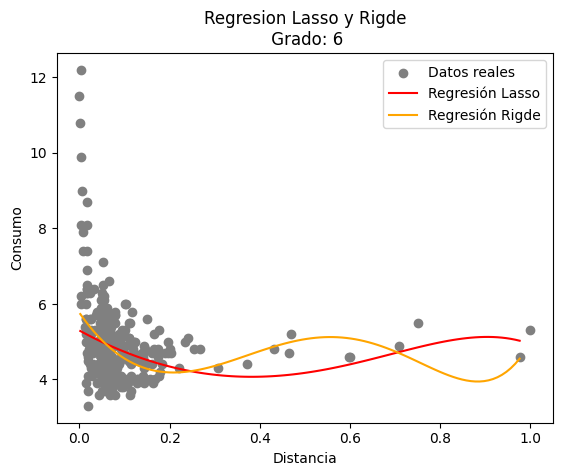

In [56]:
df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values
X = x.reshape(-1, 1)  

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# 80 - 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13) # Transformación para realizar la curva

grado = 6
poly = PolynomialFeatures(grado)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

lasso = Lasso(alpha=0.001).fit(X_train_poly, y_train)
rigde = Ridge(alpha=0.001).fit(X_train_poly, y_train)

y_pred_l = lasso.predict(X_test_poly)
print('Error Cuadrático Medio Lasso:', mean_squared_error(y_test, y_pred_l))
y_pred_r = rigde.predict(X_test_poly)
print('Error Cuadrático Medio Rigde:', mean_squared_error(y_test, y_pred_r))

x_linea = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
x_linea_poly = poly.fit_transform(x_linea)
y_pred_l_poly = lasso.predict(x_linea_poly)
y_pred_r_poly = rigde.predict(x_linea_poly)

plt.scatter(X,y, color='grey')
plt.plot(x_linea, y_pred_l_poly, color='red')
plt.plot(x_linea, y_pred_r_poly, color='orange')
plt.title(f"Regresion Lasso y Rigde\n Grado: {grado}")
plt.legend(["Datos reales","Regresión Lasso", "Regresión Rigde"])
plt.xlabel("Distancia")
plt.ylabel("Consumo")
plt.show()

**Respuesta:**
 - Al evaluar los modelos con distintos grados, nos damos cuenta que el modelo más estable para este ejercicio, es el modelo Lasso, ya que al aumentar la gradualidad, el modelo Ridge aumenta con creces el error cuadrático medio. Sin embargo, al mantener una gradualidad baja, el modelo Ridge disminuye el error, llegando a ser menor que el error del modelo Lasso.

También se pudo apreciar que con un menor grado ambos modelos se unen prácticamente en una misma curva. También concluimos que el modelo Lasso mantiene la penalización sobre los valores aislados (ruido).
 - Error Cuadrático Medio Lasso: 1.9255964074915055
 - Error Cuadrático Medio Rigde: 1.750469112217002

Conforme a lo expuesto, consideramoc como modelo para este análisis: Rigde